# Lógica Fuzzy



**Lógica Difusa ou Lógica Nebulosa**



*   **Entrada (antecedentes)**


> **Qualidade do café da manhã de um Hotel**


> > Lógica Clássica (Crisp) de 0 a 10 \\
> > Lógica Nebulosa (Fuzzy) péssimo, gostoso, delicioso


> **Qualidade do serviço do café da manhã**


> > Lógica Clássica (Crisp) de 0 a 10 \\
> > Lógica Nebulosa (Fuzzy) péssimo, bom, ótimo

*   **Saída (consequentes)**


> **Gorjeta**


> > Lógica Clássica (Crisp) de 0 a 25% \\
> > Lógica Nebulosa (Fuzzy) pouco, mais ou menos, alta


# **Regras de Decisão**

> **SE** o serviço foi excelente ou o café estava delicioso **ENTÃO** a gorjeta deve ser alta

> **SE** o serviço foi aceitável **ENTÃO** a gorjeta deve ser mais ou menos

> **SE** o serviço foi ruim e o café estava péssimo **ENTÃO** a gorjeta deve ser baixa















In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=ad3ae8c5d9187ceb3fb67c69b02cf9ab417792b73b03259bdec31b718c71afc0
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzzy
from skfuzzy import control as ct
import numpy as np

#Criando variáveis do problema

cafe_da_manha = ct.Antecedent(np.arange(0, 11, 1), 'cafe_da_manha')
servico = ct.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ct.Consequent(np.arange(0, 26, 1), 'gorjeta')

#automf cria automaticamente o mapeamento entre valores crisp e fuzzy

cafe_da_manha.automf(names=['pessimo', 'gostoso', 'delicioso'])

#criando as funções de pertinência com tipos váriados

servico['pessimo'] = fuzzy.trimf(servico.universe, [0, 0, 5])
servico['bom'] = fuzzy.gaussmf(servico.universe, 5, 2)
servico['ótimo'] = fuzzy.gaussmf(servico.universe, 10, 3)

gorjeta['pouco'] = fuzzy.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['mais_ou_menos'] = fuzzy.trapmf(gorjeta.universe, [0, 13,15, 25])
gorjeta['alta'] = fuzzy.trimf(gorjeta.universe, [15, 25, 25])

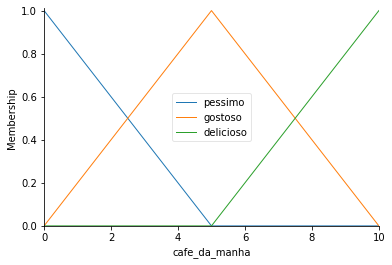

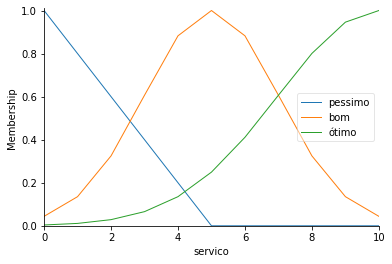

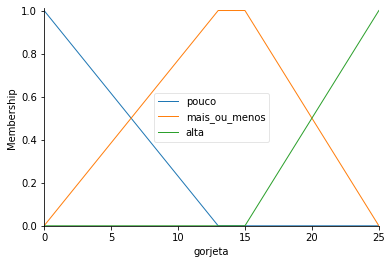

In [ ]:
cafe_da_manha.view()
servico.view()
gorjeta.view()

# **Criando as regras Nebulosas**



In [ ]:
rule1 = ct.Rule(servico['ótimo'] | cafe_da_manha['delicioso'], gorjeta['alta'])
rule2 = ct.Rule(servico['bom'], gorjeta['mais_ou_menos'])
rule3 = ct.Rule(servico['pessimo'] & cafe_da_manha['pessimo'], gorjeta['pouco'])

# **Simulando Controlador Nebuloso**


In [ ]:
gorjeta_ctrl = ct.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ct.ControlSystemSimulation(gorjeta_ctrl)

In [ ]:
#Entrando com valores para simular um resultado
gorjeta_simulador.input['cafe_da_manha'] = 5
gorjeta_simulador.input['servico'] = 10

In [ ]:
# Computando o resultado
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

20.042552675695433


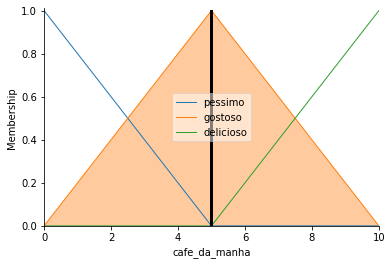

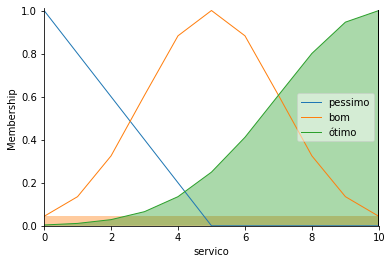

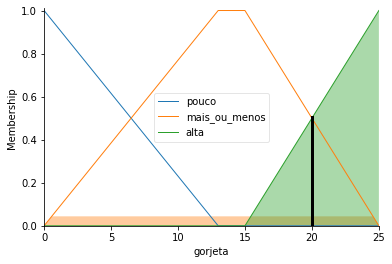

In [ ]:
cafe_da_manha.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)